# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
# dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())
%load_ext autoreload
%autoreload 2
# %tb

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [23]:
import logging
logging.basicConfig(level=logging.INFO)
from loguru import logger
logger.remove()
logger.add(sys.stdout, format="{level} {message}", filter="my_module", level="INFO")
import pandas as pd

from extractors.loader import Loader
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [5]:
from extractors.LocationData import LocationData
sceneData = LocationData.load("../data/location-2/lab", "2022-12-07-fps-5-scene-10.dll")
pedDf = sceneData.getPedDataInSceneCoordinates()
otherDf = sceneData.getOtherDataInSceneCoordinates()
sceneMeta = sceneData.getMeta()

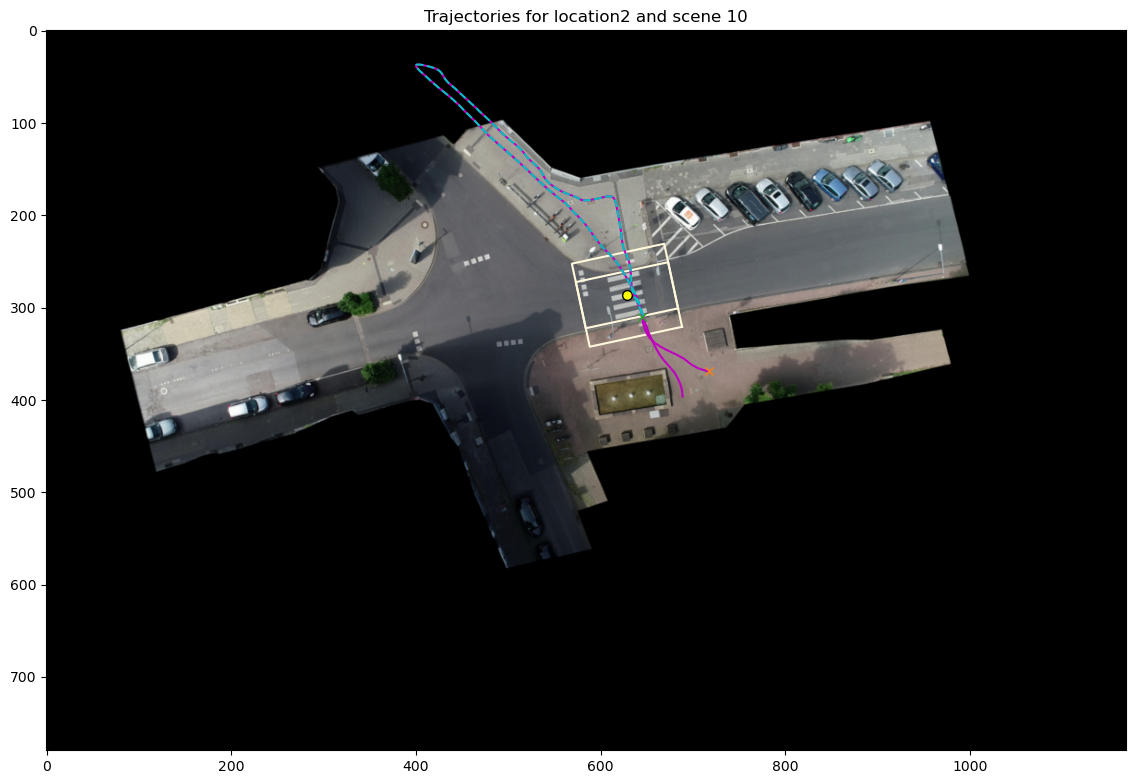

In [6]:
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[26167])

In [7]:
ped26167 = pedDf[pedDf["uniqueTrackId"]==26167]

In [9]:
ped26167.to_csv("../data/location-2/problemTracks/ped26167.csv")

In [11]:
# visualize all peds
from math import ceil
allPedIds = sceneData.uniquePedIds()
# limit = 50
# nPedIds = len(allPedIds)
# nPages = ceil(nPedIds / limit)
# for page in range(nPages):
#     offset = page * limit
#     visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=False, offset=offset, limit=limit)

In [12]:
problemId = allPedIds[411]
problemTrack = pedDf[pedDf["uniqueTrackId"] == problemId]
problemId

26167

In [13]:
print(TrajectoryUtils.length(problemTrack, xCol="sceneX", yCol="sceneY"))

75.64104831812152


In [14]:
print(allPedIds)

<IntegerArray>
[18023, 18042, 18053, 18069, 18090, 18107, 18112, 18121, 18127, 18134,
 ...
 29530, 29531, 29532, 29533, 29534, 29542, 29554, 29559, 29575, 29579]
Length: 628, dtype: Int64


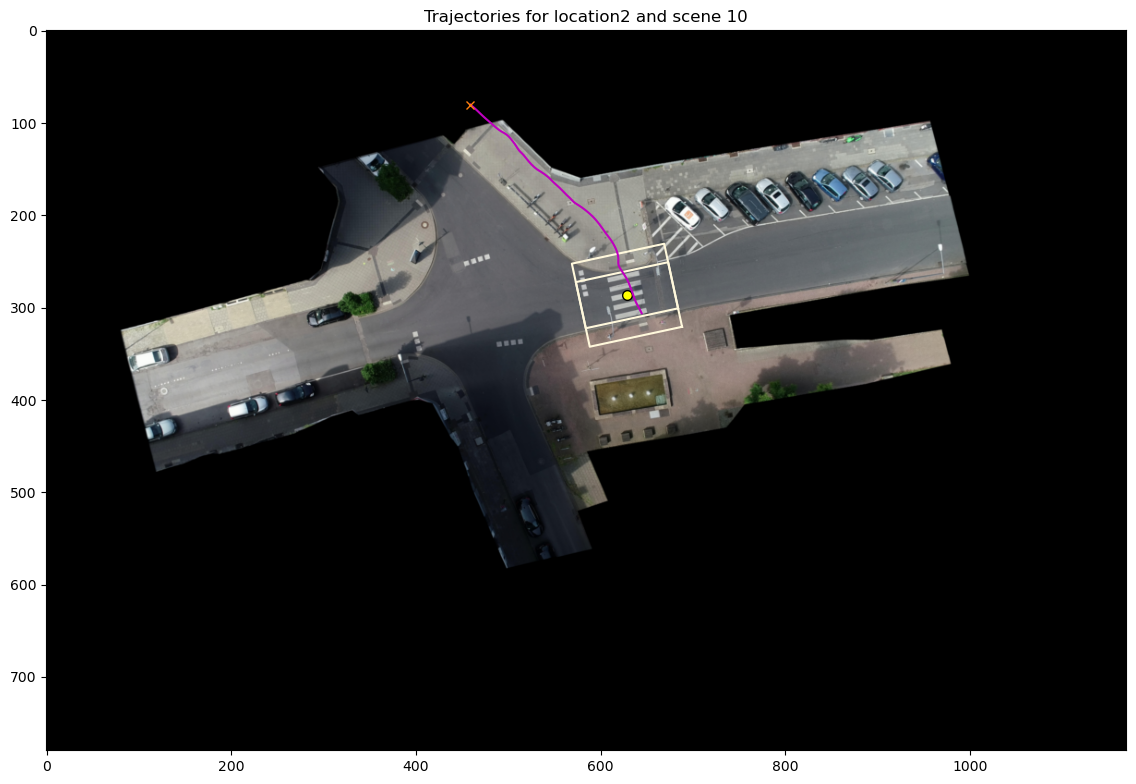

In [100]:
# trackDf = pedDf[pedDf["uniqueTrackId"] == 18042]
visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[23010])

## Testing splitting long trajectories

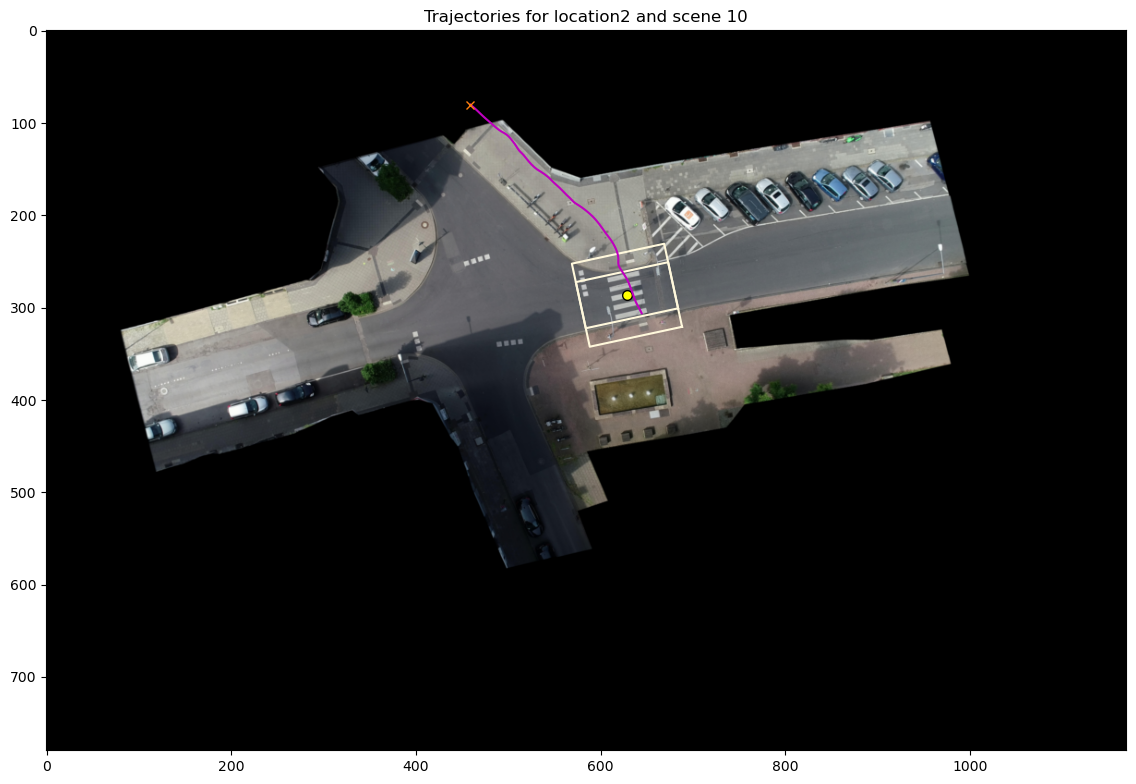

In [102]:

visualizer.showLocationSceneData(sceneData, onlyClipped=False, showLocal=False, showOthers=True, ids=[23010])

In [108]:
trackDf = sceneData.pedData[sceneData.pedData["uniqueTrackId"]==23010]
trackDf.tail()

index  recordingId  trackId  frame  trackLifetime   xCenter  yCenter  \
38055  113857           23       10    515            515  45.76647 -8.63546   
38056  113858           23       10    520            520   45.5479 -8.42866   
38057  113859           23       10    525            525  45.32408 -8.22545   
38058  113860           23       10    530            530  45.08874 -8.02172   
38059  113861           23       10    535            535  44.85102  -7.8181   

         heading  width  length  xVelocity  yVelocity  xAcceleration  \
38055  138.39238    0.0     0.0   -1.09548    1.03338        -0.0732   
38056  138.15111    0.0     0.0   -1.11373    1.02862        -0.1119   
38057   137.9179    0.0     0.0   -1.14517    1.02388       -0.13523   
38058  137.68467    0.0     0.0   -1.17486    1.01972       -0.13776   
38059  137.44796    0.0     0.0   -1.20241    1.01641       -0.13776   

       yAcceleration  uniqueTrackId sceneId  roadWidth  
38055        0.01709          23010      10        5.0  
38056        -0.0079          23010      10        5.0  
38057       -0.01523          23010      10        5.0  
38058       -0.01654          23010      10        5.0  
38059       -0.01654          23010      10        5.0

In [114]:

scenePolygon = TrajectoryUtils.scenePolygon(
    sceneData.sceneConfig, 
    sceneData.sceneConfig["boxWidth"], 
    sceneData.sceneConfig["roadWidth"] + 2
)
# print(scenePolygon)

brokenTracks = TrajectoryUtils.clipByRectWithSplits(
    trackDf, 
    xCol="xCenter",
    yCol="yCenter",
    frameCol="frame",
    rect=scenePolygon
)

POLYGON ((67.06547752662695 -30.377277465236183, 65.58978657040966 -23.534592597310542, 55.81452247337303 -25.64272253476383, 57.29021342959033 -32.48540740268947, 67.06547752662695 -30.377277465236183))


In [99]:
len(brokenTracks)

0

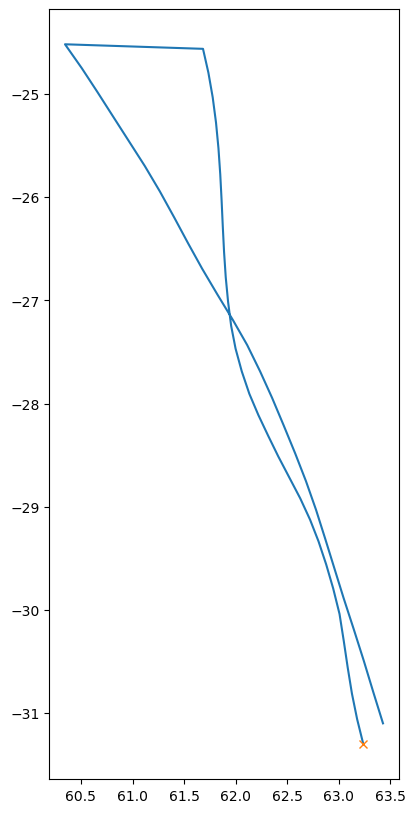

In [68]:
visualizer.showLocalTrajectories(
    pd.concat(brokenTracks), 
    idCol="uniqueTrackId", 
    xCol="xCenter",
    yCol="yCenter"
)

In [76]:
from collections import defaultdict
sceneData.problematicIds = defaultdict(lambda : set([]))
sceneData.warnings = []
sceneData._clipPed(2)

clipping ped trajectories for scene # 10 with width offset 2: 100%|██████████████████| 628/628 [00:21<00:00, 29.28it/s]


In [77]:

sceneData._clipOther()

clipping other trajectories for scene # 10: 100%|██████████████████████████████████| 1604/1604 [00:53<00:00, 29.89it/s]


In [78]:
sceneData.warnings

['pedestrian 18308: Disregarding as the length 3.74829098785574 is too short or rows too less (14)',
 'pedestrian 18308: ERROR: No valid clipped trajectory',
 'pedestrian 19240: Disregarding as the length 3.1094560579363213 is too short or rows too less (9)',
 'pedestrian 19240: ERROR: No valid clipped trajectory',
 'pedestrian 20028: Disregarding as the length 3.9875505465765846 is too short or rows too less (17)',
 'pedestrian 20028: ERROR: No valid clipped trajectory',
 'pedestrian 20287: enters the scene 2 times',
 'pedestrian 20287: Disregarding as the length 1.5818166039812258 is too short or rows too less (7)',
 'pedestrian 20314: enters the scene 2 times',
 'pedestrian 20314: Disregarding as the length 0.18161004818015622 is too short or rows too less (7)',
 'pedestrian 20389: enters the scene 2 times',
 'pedestrian 20389: Disregarding as the length 0.8352575982451909 is too short or rows too less (4)',
 'pedestrian 21102: Disregarding as the length 2.7122111985554405 is too sh

In [79]:
print(len(sceneData.uniquePedIds()))
print(len(sceneData.uniqueClippedPedIds()))

628
619


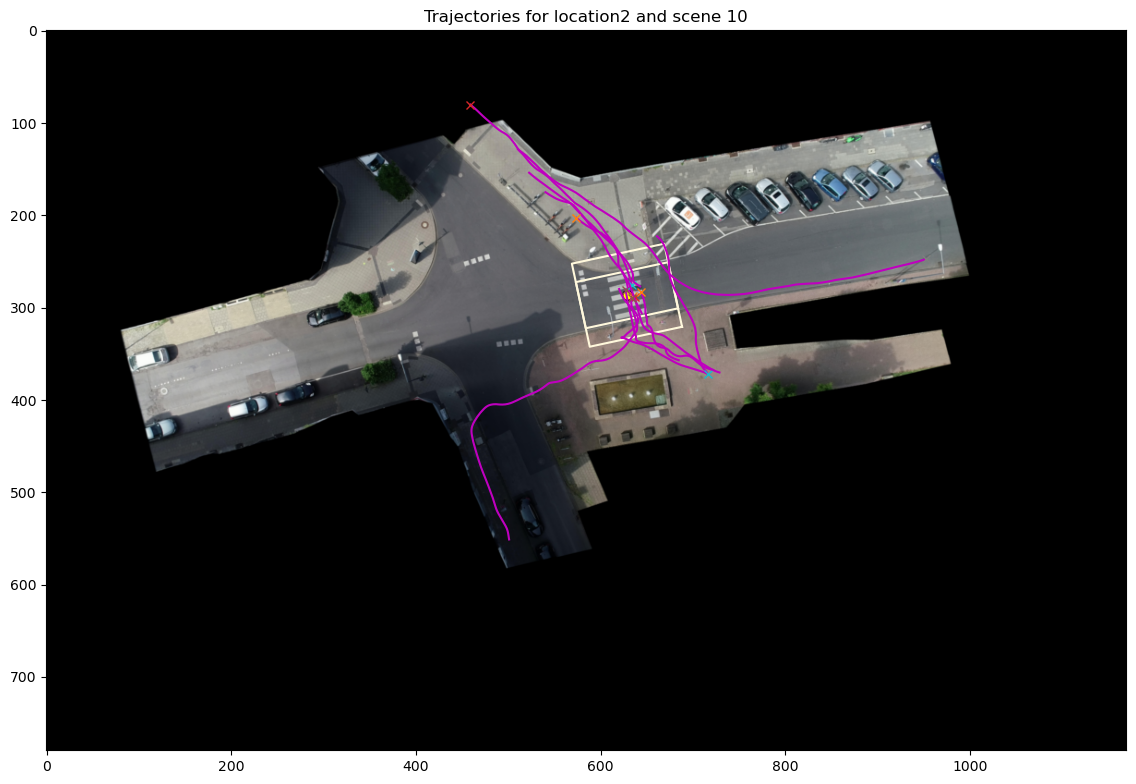

In [85]:

visualizer.showLocationSceneData(
    sceneData, 
    onlyClipped=False, 
    showLocal=False, 
    showOthers=True, 
    ids=sceneData.problematicIds['pedestrian'])

23010 0 535


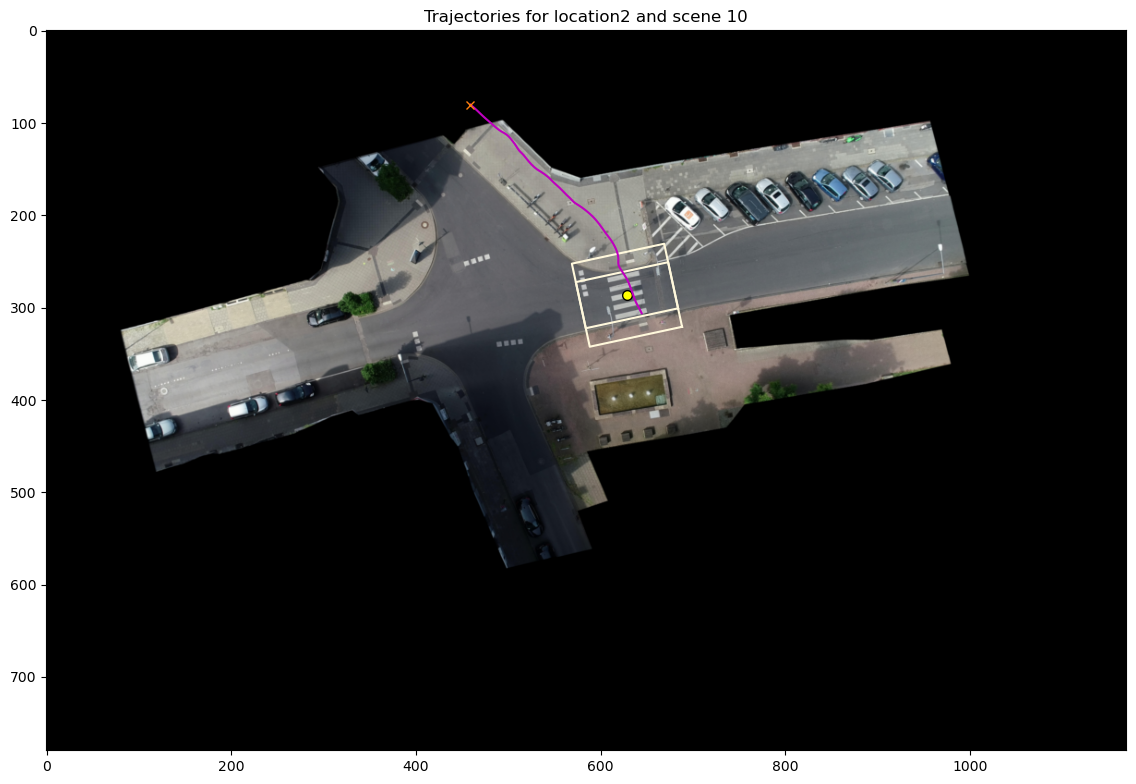

18308 20440 20715


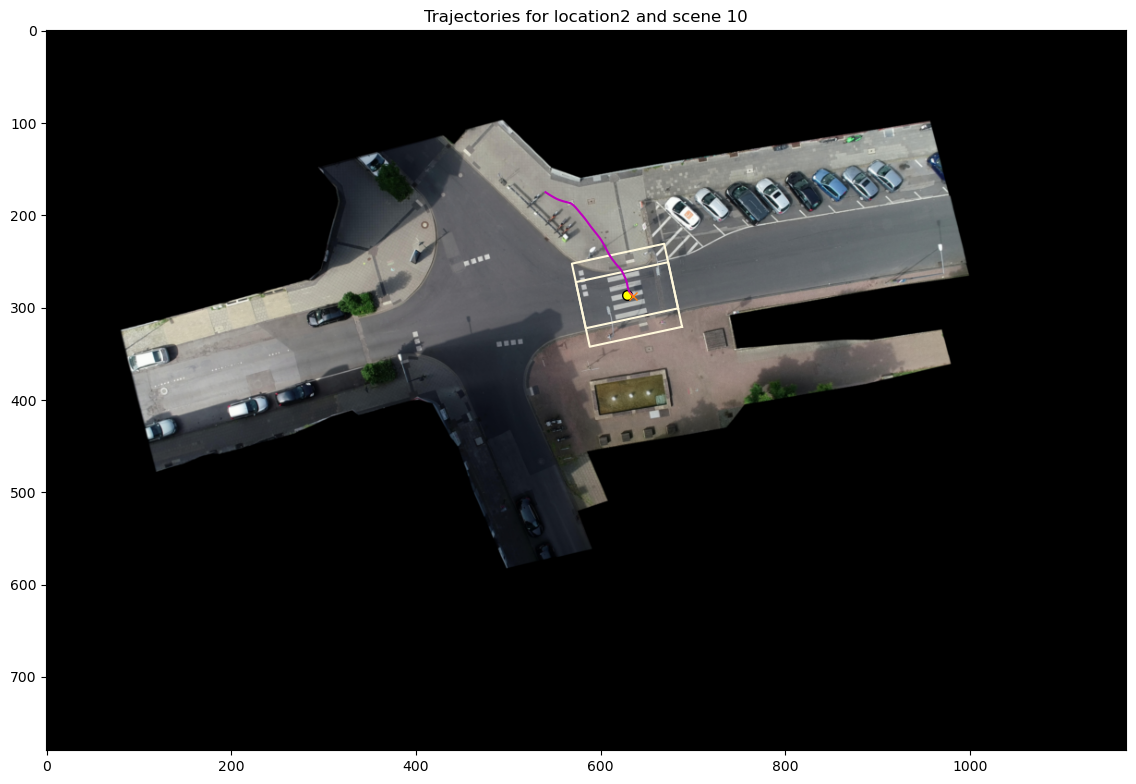

25284 15927 16717


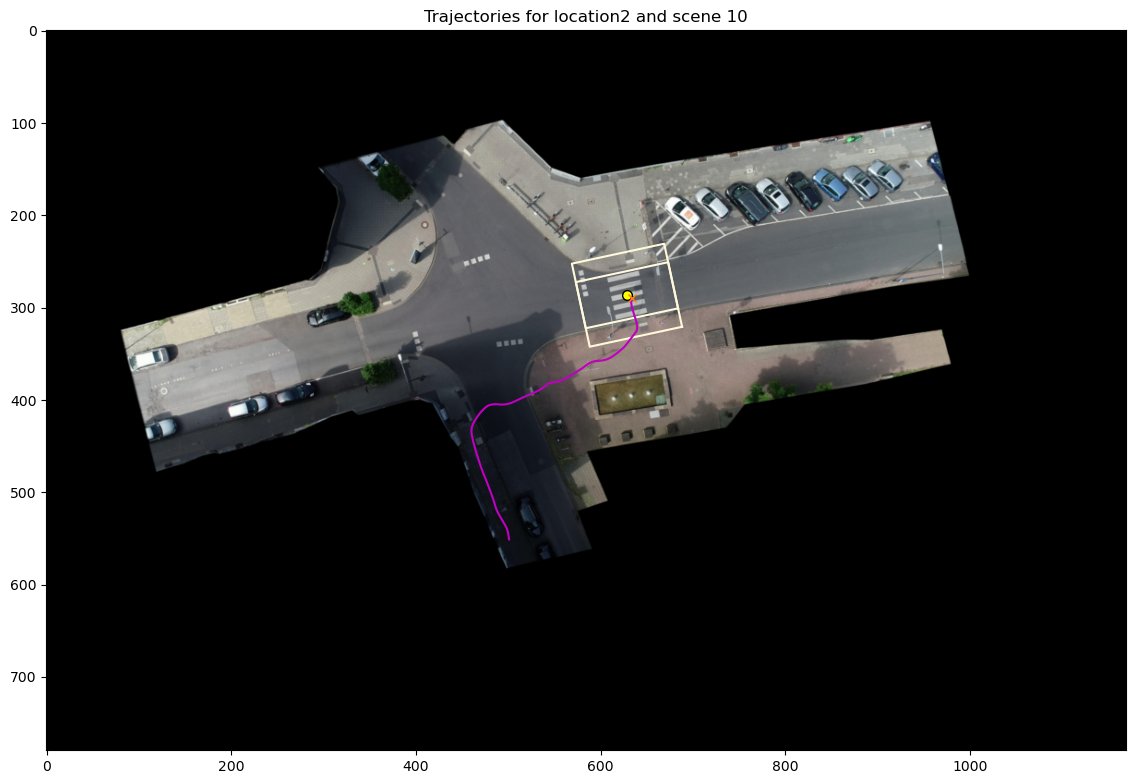

29287 14037 14342


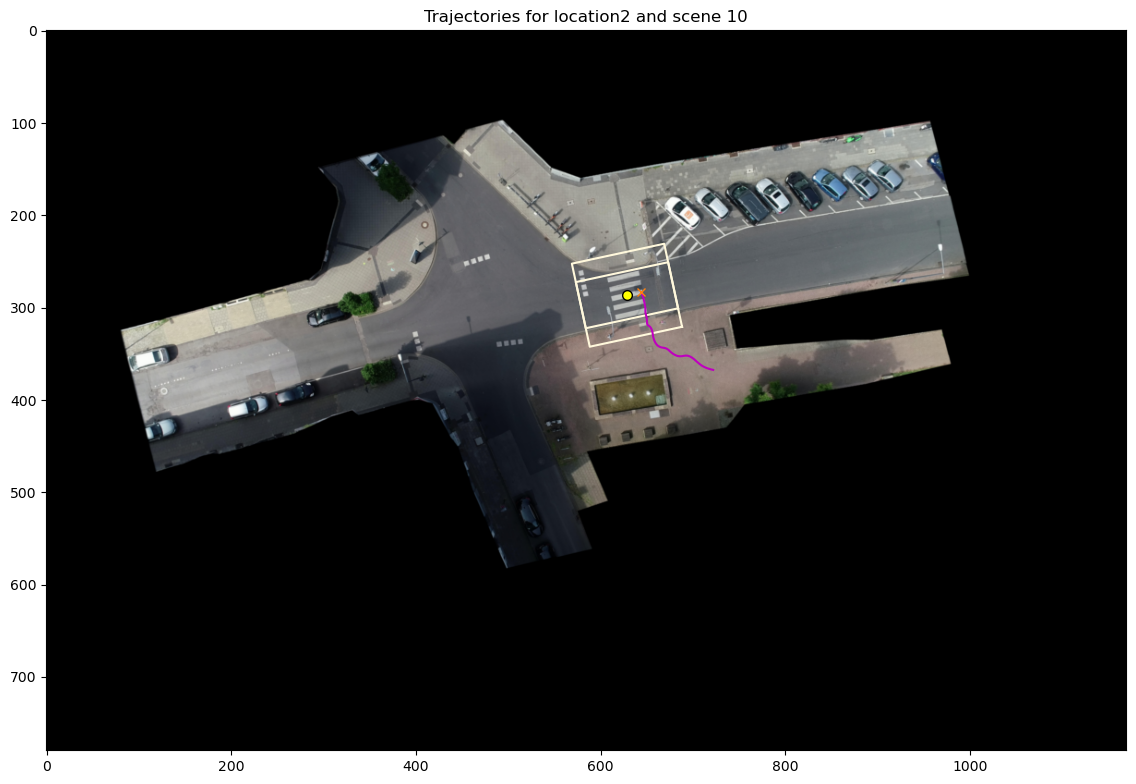

19240 16793 17088


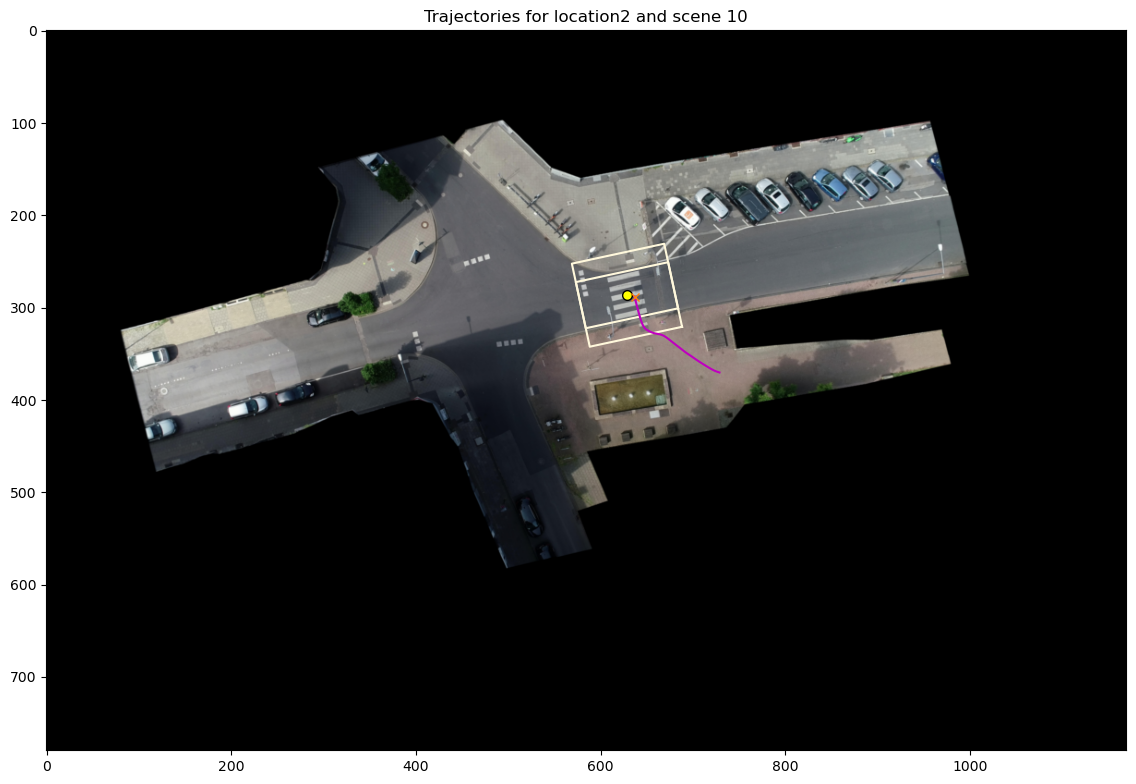

21102 4069 5084


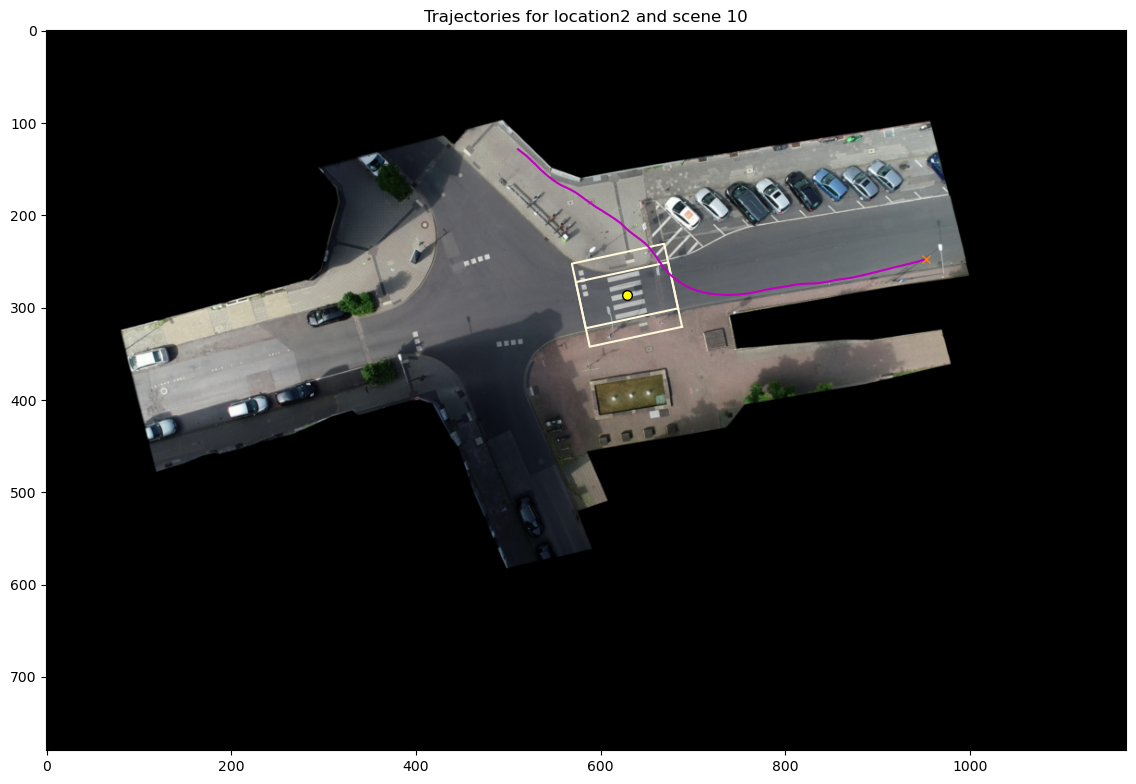

27159 7226 7546


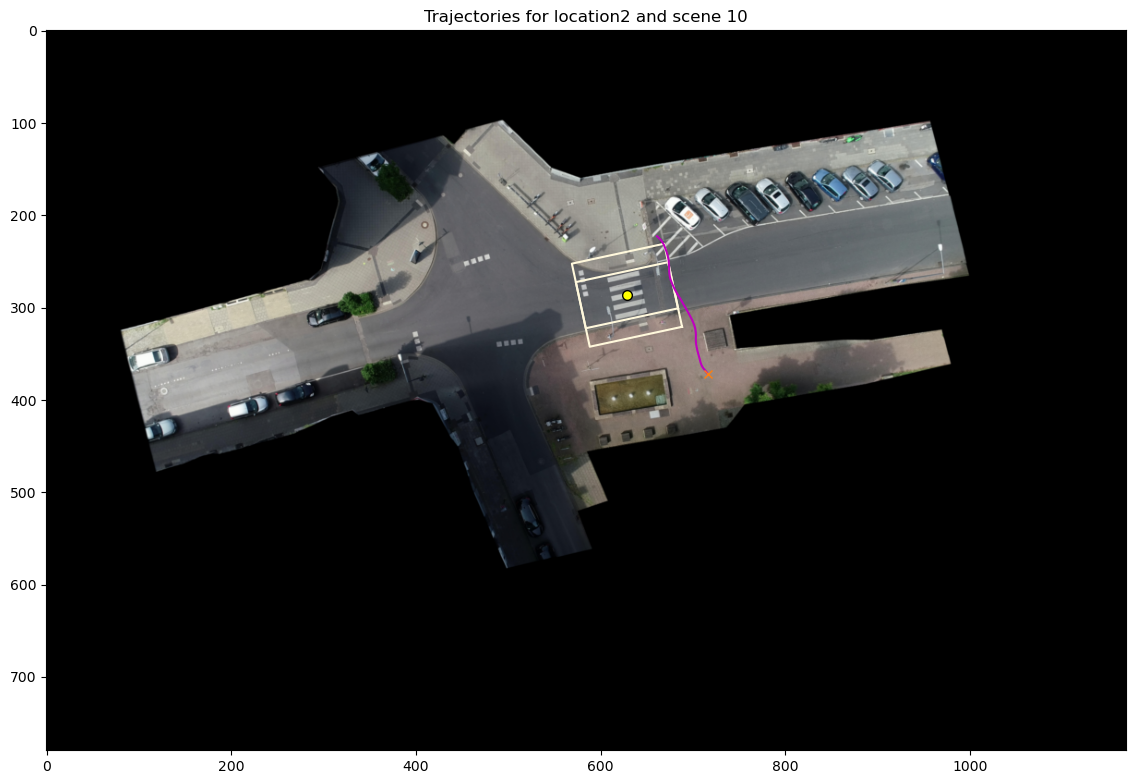

27003 0 465


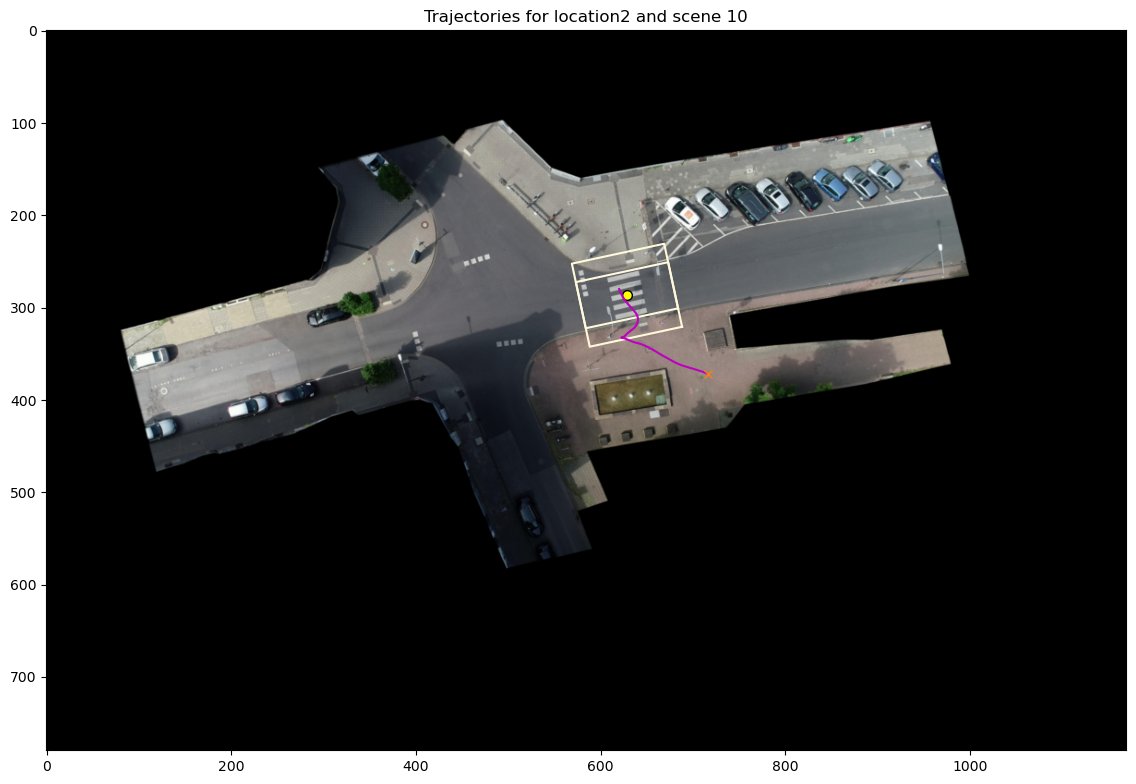

20028 246 561


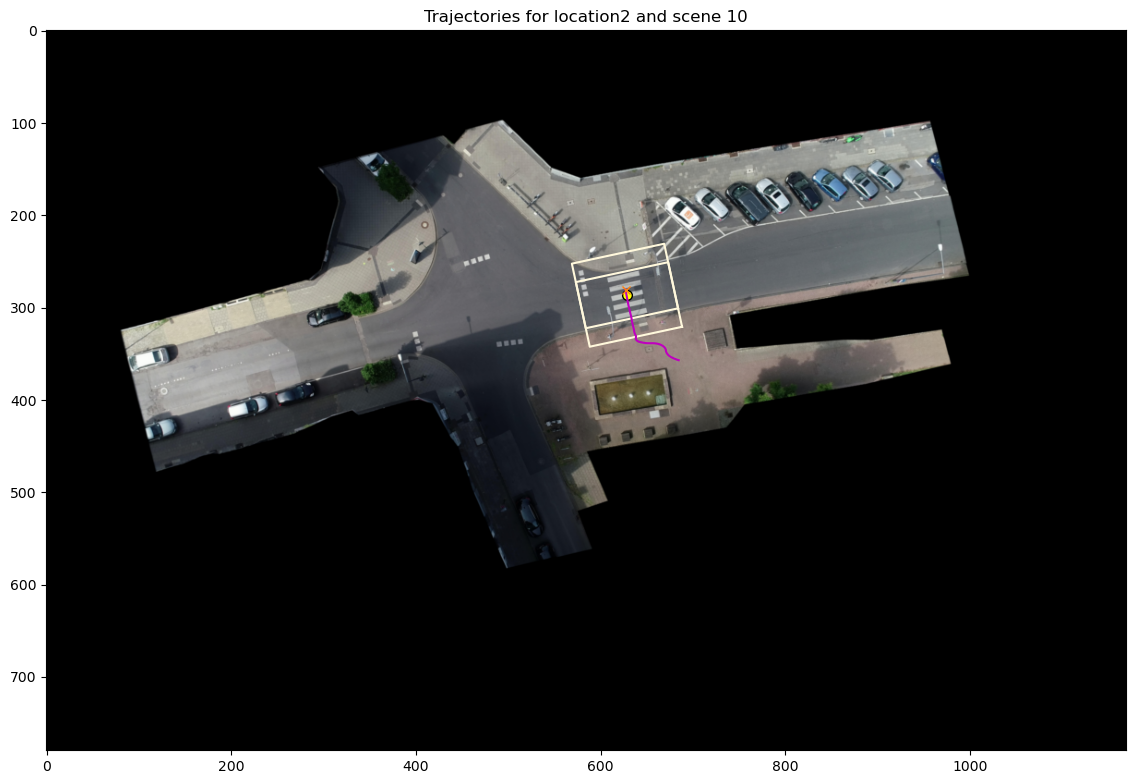

22302 15651 15851


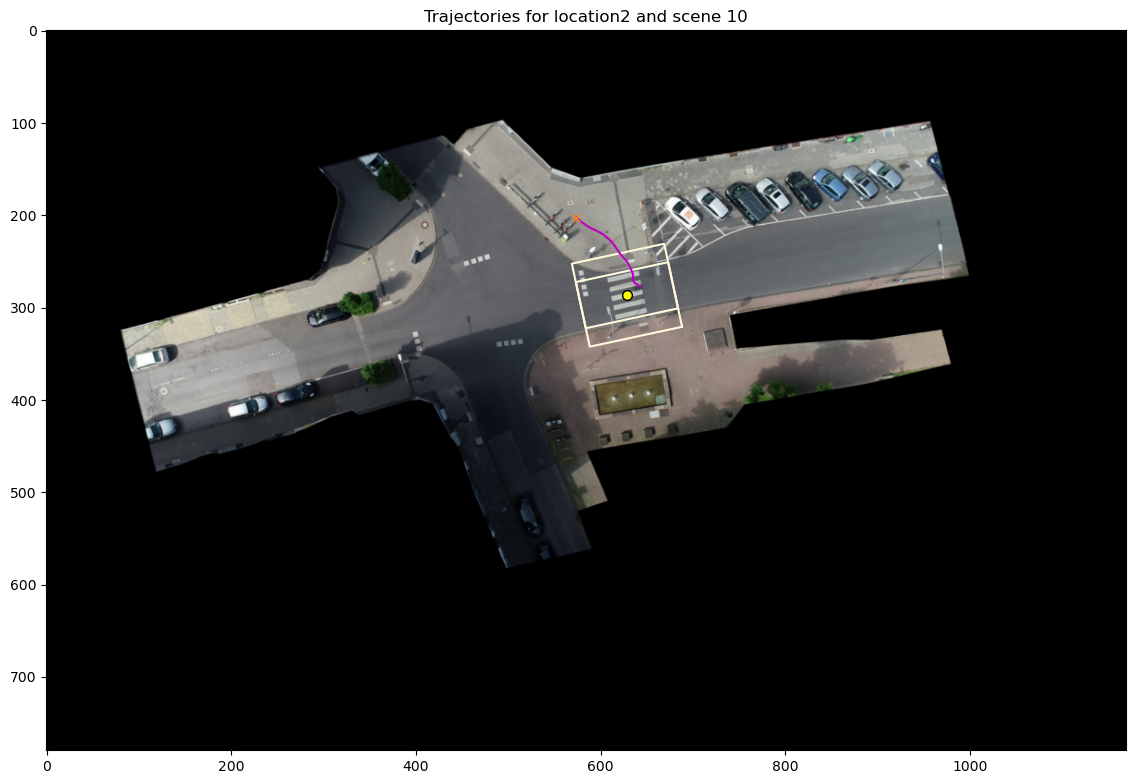

21215 11016 11391


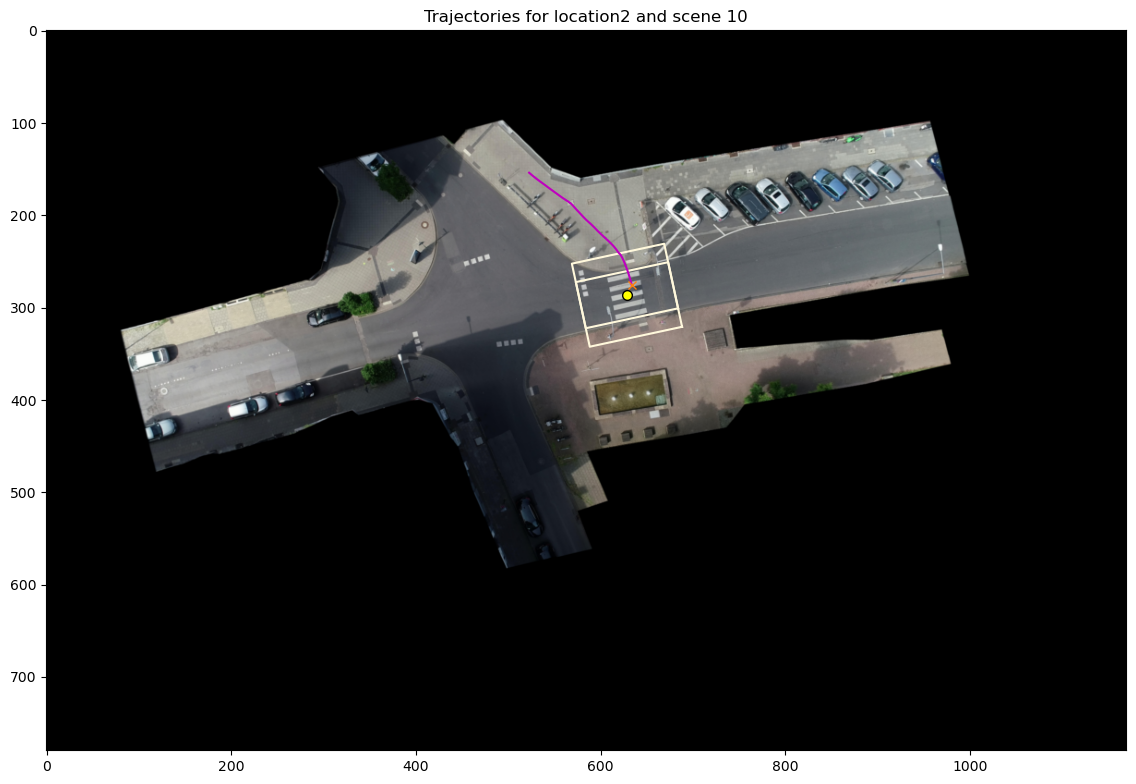

In [97]:
for problemId in sceneData.problematicIds['pedestrian']:
    
    trackDf = sceneData.pedData[sceneData.pedData["uniqueTrackId"] == problemId]
    print(problemId, trackDf.iloc[0]['frame'], trackDf.iloc[-1]['frame'])
    visualizer.showLocationSceneData(
        sceneData, 
        onlyClipped=False, 
        showLocal=False, 
        showOthers=True, 
        ids=[problemId])

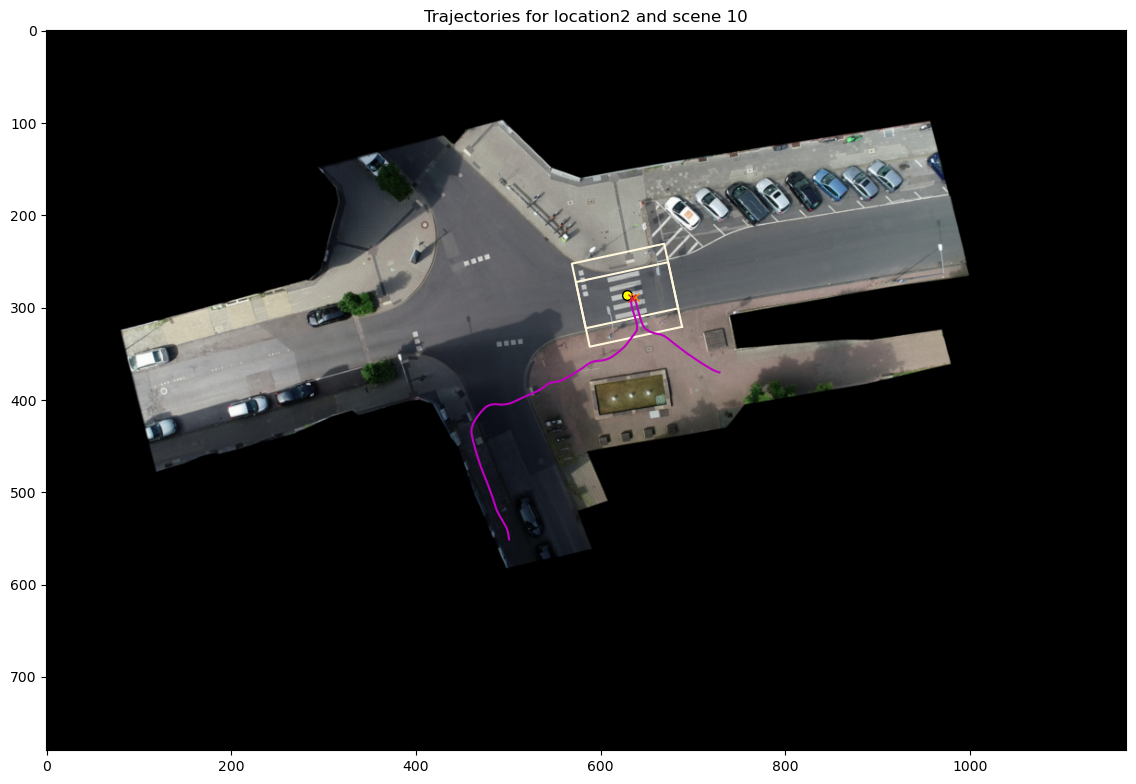

In [95]:

visualizer.showLocationSceneData(
    sceneData, 
    onlyClipped=False, 
    showLocal=False, 
    showOthers=True, 
    ids=[25284, 19240])